## Implement a stack using an array 

In this notebook, we'll look at one way to implement a stack. First, check out the walkthrough for an overview, and then you'll get some practice implementing it for yourself.


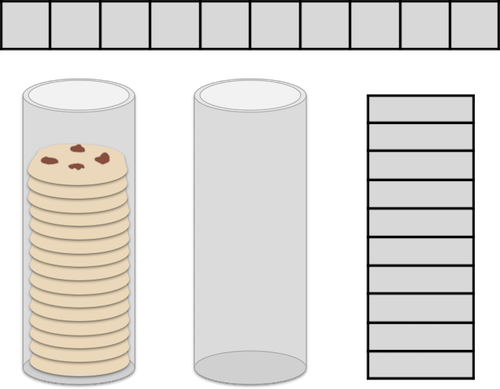



Below we'll go through the implementation step by step. Each step has a walkthrough and also a solution. We recommend that you first watch the walkthrough, and then try to write the code on your own.

When you first try to remember and write out the code for yourself, this effort helps you understand and remember the ideas better. At the same time, it's normal to get stuck and need a refresher—so don't hesitate to use the Show Solution buttons when you need them. 

### Functionality 

Our goal will be to implement a `Stack` class that has the following behaviors:

1. `push` - adds an item to the top of the stack
2. `pop` - removes an item from the top of the stack (and returns the value of that item)
3. `size` - returns the size of the stack
4. `top` - returns the value of the item at the top of stack (without removing that item)
5. `is_empty` - returns True if the stack is empty and False otherwise

#### 1. Create and initialize the Stack class


First, have a look at the walkthrough:



In the cell below:

- Define a class named Stack and add the `__init__` method
- Initialize the `arr` attribute with an array containing 10 elements, like this: `[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]`
- Initialize the `next_index` attribute
- Initialize the `num_elements` attribute

In [4]:
class Stack():
    def __init__(self , initial_size=10):
        self.arr=[0 for _ in range(initial_size)]
        self.next_index= 0
        self.num_elements= 0 

Let's check that the array is being initialized correctly. We can create a Stack object and access the arr attribute, and we should see our ten-element array:



In [6]:
foo=Stack()
print(foo.arr)
print("Pass" if foo.arr == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] else "Fail")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Pass


#### 2. Add the push method

Next, we need to define our `push` method, so that we have a way of adding elements to the top of the stack.


Now give it a try for yourself. Here's are the key things to include:

- The method will need to have a parameter for the value that you want to push
- Remember that `next_index` will have the index for where the value should be added
- Once you've added the value, you'll want to increment both `next_index` and `num_elements`

In [7]:
class Stack():
    def __init__(self , initial_size=10):
        self.arr=[0 for _ in range(initial_size)]
        self.next_index= 0
        self.num_elements= 0

    def push(self, data):
        self.arr[self.next_index] = data
        self.next_index +=1 
        self.num_elements +=1


Let's test it by creating a stack object and pushing an item onto the stack:



In [8]:
foo = Stack()
foo.push("Test!")
print(foo.arr)
print("Pass" if foo.arr[0] == "Test!" else "Fail")

['Test!', 0, 0, 0, 0, 0, 0, 0, 0, 0]
Pass


#### 3. Handle full capacity

Great, the `push` method seems to be working fine! But we know that it's not done yet. If we keep pushing items onto the stack, eventually we will run out of room in the array. Currently, that will cause an `Index out of range` error. In order to avoid a stack overflow, we need to check the capacity of the array before pushing an item to the stack. And if the array is full, we need to increase the array size before pushing the new element.

First, define the `_handle_stack_capacity_full` method:

- Define an `old_arr` variable and assign it the current (full) array
- Create a new (larger) array and assign it to `arr`.
- Iterate over the values in the old array and copy them to the new array.<br>

Then, in the `push` method:

- Add a conditional to check if the array is full; if it is, call the `_handle_stack_capacity_full`

In [14]:
class Stack:
    
    def __init__(self, initial_size = 10):
        self.arr = [0 for _ in range(initial_size)]
        self.next_index = 0
        self.num_elements = 0
        
    def push(self, data):
        # TODO: Add a conditional to check for full capacity
        if self.num_elements == len(self.arr) : 
            self.arr= self._handle_stack_capacity_full()    
            
        self.arr[self.next_index] = data
        self.next_index += 1
        self.num_elements += 1
    
    def _handle_stack_capacity_full(self):
        old_arr=self.arr 
        self.arr= [0 for _ in range(self.num_elements * 2 )]
        for i , val in enumerate(old_arr) : 
            self.arr[i]=val 
        return self.arr
        
    # TODO: Add the _handle_stack_capacity_full method

In [15]:
print(foo.arr) # Let's see what the array looks like now!


None


We can test this by pushing items onto the stack until we exceed the original capacity. Let's try it and see if we get an error, or if the array size gets increased like we want it to.


In [16]:
foo = Stack()
foo.push(1)
foo.push(2)
foo.push(3)
foo.push(4)
foo.push(5)
foo.push(6)
foo.push(7)
foo.push(8)
foo.push(9)
foo.push(10) # The array is now at capacity!
foo.push(11) # This one should cause the array to increase in size
print(foo.arr) # Let's see what the array looks like now!
print("Pass" if len(foo.arr) == 20 else "Fail") # If we successfully doubled the array size, it should now be 20.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Pass


#### 4. Add the size and is_empty methods
Next, we need to add a couple of simple methods:

- Add a `size` method that returns the current size of the stack
- Add an `is_empty` method that returns `True` if the stack is empty and `False` otherwise
(This one is pretty straightforward, so there's no walkthrough—but there's still solution code below if you should need it.)

In [17]:
class Stack:
    
    def __init__(self, initial_size = 10):
        self.arr = [0 for _ in range(initial_size)]
        self.next_index = 0
        self.num_elements = 0
        
    def push(self, data):
        if self.num_elements == len(self.arr) : 
            self.arr= self._handle_stack_capacity_full()    
            
        self.arr[self.next_index] = data
        self.next_index += 1
        self.num_elements += 1
    
    def size(self): 
        return self.num_elements
    
    def is_empty(self):
        return self.num_elements == 0 
    
    def _handle_stack_capacity_full(self):
        old_arr=self.arr 
        self.arr= [0 for _ in range(self.num_elements * 2 )]
        for i , val in enumerate(old_arr) : 
            self.arr[i]=val 
        return self.arr
        


Let's test the new methods:


In [18]:
foo = Stack()
print(foo.size()) # Should return 0
print(foo.is_empty()) # Should return True
foo.push("Test") # Let's push an item onto the stack and check again
print(foo.size()) # Should return 1
print(foo.is_empty()) # Should return False

0
True
1
False


#### 5. Add the pop method
The last thing we need to do is add the pop method.

The method needs to:

- Check if the stack is empty and, if it is, return None
- Decrement next_index and num_elements
- Return the item that is being "popped"

In [32]:
class Stack:
    
    def __init__(self, initial_size = 10):
        self.arr = [0 for _ in range(initial_size)]
        self.next_index = 0
        self.num_elements = 0
        
    def push(self, data):
        if self.num_elements == len(self.arr) : 
            self.arr= self._handle_stack_capacity_full()    
            
        self.arr[self.next_index] = data
        self.next_index += 1
        self.num_elements += 1
    
    def pop(self):
        if self.is_empty():
            self.next_index = 0
            return None
        self.next_index -= 1
        self.num_elements -= 1
        return self.arr[self.next_index]
    
    def size(self): 
        return self.num_elements
    
    def is_empty(self):
        return self.num_elements == 0 
    
    def _handle_stack_capacity_full(self):
        old_arr=self.arr 
        self.arr= [0 for _ in range(self.num_elements * 2 )]
        for i , val in enumerate(old_arr) : 
            self.arr[i]=val 
        return self.arr
        

Let's test the pop method:

In [36]:

foo = Stack()
foo.push("Test") # We first have to push an item so that we'll have something to pop
print(foo.pop()) # Should return the popped item, which is "Test"
print(foo.pop()) # Should return None, since there's nothing left in the stack

Test
None
